# 12 units ESN reservoir applied to Mackey-Glass

In [1]:
# Libraries importation

import matplotlib.pyplot as plt # for plotting
import numpy as np # for numerical operations
import pandas as pd # for data manipulation
import reservoirpy as rpy # for reservoir computing
from reservoirpy.datasets import mackey_glass # for generating the dataset
from reservoirpy.nodes import Reservoir, Ridge # for reservoir computing
from reservoirpy.observables import rmse, rsquare # for reservoir computing
from tqdm import tqdm # for progress bar

# set verbosity to 0
rpy.verbosity(0)

0

In [2]:
# generate the dataset
data = mackey_glass(n_timesteps=17520)

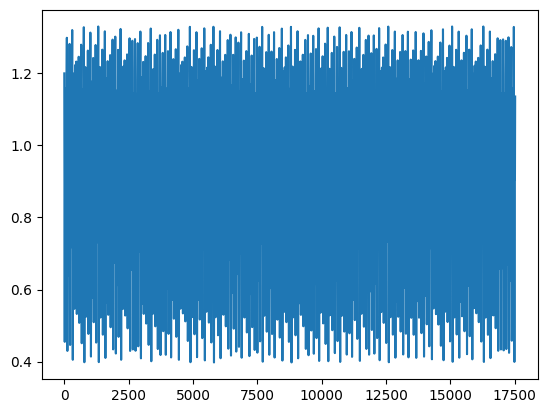

In [3]:
# plot the dataset
plt.plot(data)

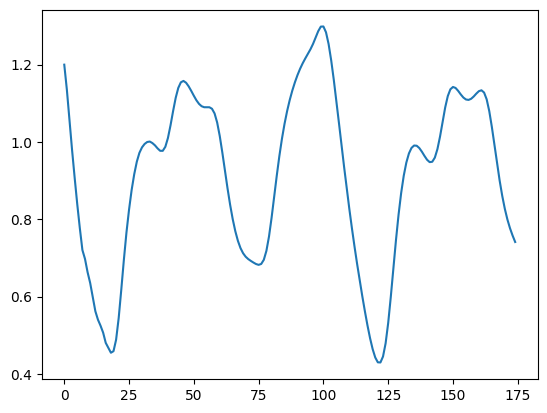

In [4]:
# partial plot of the dataset (1%)
plt.plot(data[:175])

# LR parameter optimization

In [5]:
# create an array with every lr value we want to test
lr_array = np.linspace(0, 1, 11)
# create an empty array to store every outcome
predictions_array = []

# loop over every lr value
for i in tqdm(lr_array):
    reservoir = Reservoir(units=12, lr=i) # create a 12 units reservoir
    readout = Ridge(output_dim=1, ridge=1e-5) # create a ridge readout
    esn = reservoir >> readout # create the ESN
    esn.fit(data[:8760], data[1:8761], warmup=876) # fit the ESN with 50% of the data and warmup of 10%
    predictions = esn.run(data[8761:-1]) # run the ESN
    predictions = esn.fit(data[:8760], data[1:8761]).run(data[8761:-1]) # fit and run the ESN with the other 50% of the data
    predictions_array.append(predictions) # append the predictions to the array

100%|██████████| 11/11 [00:31<00:00,  2.84s/it]


In [6]:
initial_rmse = 1 # initial rmse value
initial_rsquare = 0 # initial rsquare value
rmse_index = 0 # index of the best rmse
rsquare_index = 0 # index of the best rsquare

# loop over lr values
for i in range(len(lr_array)):
    # if rmse is better than the initial one
    if rmse(data[8762:], predictions_array[i]) < initial_rmse:
        initial_rmse = rmse(data[8762:], predictions_array[i]) # update initial rmse
        rmse_index = i # update index of the best rmse
    # if rsquare is better than the initial one
    if rsquare(data[8762:], predictions_array[i]) > initial_rsquare:
        initial_rsquare = rsquare(data[8762:], predictions_array[i]) # update initial rsquare
        rsquare_index = i # update index of the best rsquare
    
# print best rmse
print("Best RMSE: ", initial_rmse, "for lr = ", lr_array[rmse_index]) 
# print best rsquare
print("Best R^2: ", initial_rsquare, "for lr = ", lr_array[rsquare_index])

# if the best lr for rmse is the same as the best lr for rsquare
if (rmse_index == rsquare_index):
    best_lr = lr_array[rmse_index] # create best lr variable

Best RMSE:  0.011618408938785421 for lr =  1.0
Best R^2:  0.9974160268176059 for lr =  1.0


# SR parameter optimization

In [7]:
# create an array with every sr value we want to test
sr_array = np.linspace(0, 1, 11)
# create an empty array to store every outcome
predictions_array = []

# loop over every sr value
for i in tqdm(sr_array):
    reservoir = Reservoir(units=12, sr=i) # create a 12 units reservoir
    readout = Ridge(output_dim=1, ridge=1e-5) # create a ridge readout
    esn = reservoir >> readout # create the ESN
    esn.fit(data[:8760], data[1:8761], warmup=876) # fit the ESN with 50% of the data and warmup of 10%
    predictions = esn.run(data[8761:-1]) # run the ESN
    predictions = esn.fit(data[:8760], data[1:8761]).run(data[8761:-1]) # fit and run the ESN with the other 50% of the data
    predictions_array.append(predictions) # append the predictions to the array

100%|██████████| 11/11 [00:30<00:00,  2.81s/it]


In [8]:
initial_rmse = 1 # initial rmse value
initial_rsquare = 0 # initial rsquare value
rmse_index = 0 # index of the best rmse
rsquare_index = 0 # index of the best rsquare

# loop over sr values
for i in range(len(sr_array)):
    # if rmse is better than the initial one
    if rmse(data[8762:], predictions_array[i]) < initial_rmse:
        initial_rmse = rmse(data[8762:], predictions_array[i]) # update initial rmse
        rmse_index = i # update index of the best rmse
    # if rsquare is better than the initial one
    if rsquare(data[8762:], predictions_array[i]) > initial_rsquare:
        initial_rsquare = rsquare(data[8762:], predictions_array[i]) # update initial rsquare
        rsquare_index = i # update index of the best rsquare

# print best rmse
print("Best RMSE: ", initial_rmse, "for sr = ", sr_array[rmse_index])
# print best rsquare
print("Best R^2: ", initial_rsquare, "for sr = ", sr_array[rsquare_index])

# if the best sr for rmse is the same as the best sr for rsquare
if (rmse_index == rsquare_index):
    best_sr = sr_array[rmse_index] # create best sr variable

Best RMSE:  0.010862861575265713 for sr =  0.5
Best R^2:  0.9977411719307017 for sr =  0.5


# Classical reservoir with optimized parameters applied to Mackey-Glass

In [14]:
reservoir = Reservoir(units=12, lr = best_lr, sr = best_sr) # create a 12 units reservoir with the best lr and best sr
readout = Ridge(output_dim=1, ridge=1e-5) # create a ridge readout
esn = reservoir >> readout # create the ESN
esn.fit(data[:8760], data[1:8761], warmup=876) # fit the ESN with 50% of the data and warmup of 10%
predictions = esn.run(data[8761:-1]) # run the ESN
predictions = esn.fit(data[:8760], data[1:8761]).run(data[8761:-1]) # fit and run the ESN with the other 50% of the data

In [15]:
# print rmse and rsquare
print("RMSE = ", rmse(data[8762:], predictions), "R^2 = ", rsquare(data[8762:], predictions))

RMSE =  0.02515586812281518 R^2 =  0.9878863979115817


Text(0.5, 1.0, 'Predictions vs true data over 50% of the dataset')

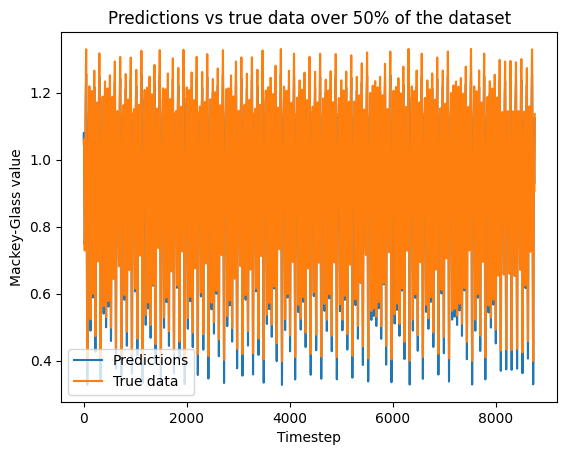

In [16]:
# plot predictions
plt.plot(predictions)
# plot true data
plt.plot(data[8762:])
# legend axis x
plt.xlabel('Timestep')
# legend axis y
plt.ylabel('Mackey-Glass value')
# legend
plt.legend(['Predictions', 'True data'])
# title
plt.title('Predictions vs true data over 50% of the dataset')

Text(0.5, 1.0, 'Predictions vs true data over 1% of the dataset')

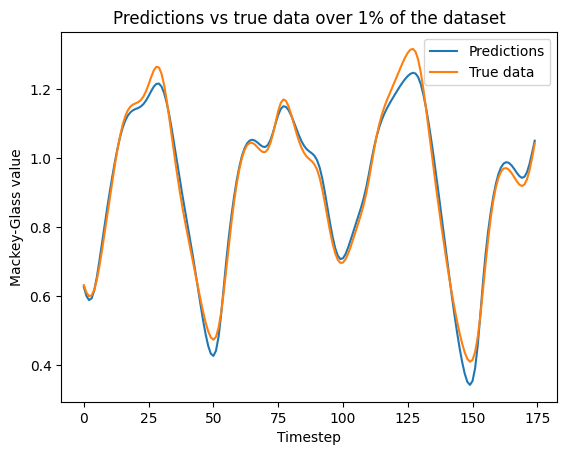

In [17]:
# partial plot predictions
plt.plot(predictions[175:350])
# partial plot true data
plt.plot(data[8937:9112])
# legend axis x
plt.xlabel('Timestep')
# legend axis y
plt.ylabel('Mackey-Glass value')
# legend
plt.legend(['Predictions', 'True data'])
# title
plt.title('Predictions vs true data over 1% of the dataset')